# Introduction to Altair

This tutorial will guide you through the process of creating visualizations in Altair.
For details on installation and other aspects of the package, please see the [Altair documentation](http://github.com/ellisonbg/altair/)

- [The Data](#The-Data)
- [The Chart Object](#The-Chart-Object)
- [Data Encodings and Marks](#Data-Encodings-and-Marks)
- [Data Transformation: Aggregation](#Data-Transformation:-Aggregation)
- [Customizing your Visualization](#Customizing-your-Visualization)
- [Publishing a Visualization Online](#Publishing-a-Visualization-Online)
- [Further Visualization Examples](#Further-Visualization-Examples)

This tutorial is written in the form on an IPython notebook; we suggest downloading the notebook and following along, executing the code yourself as we go.
For creating Altair visualizations in the notebook, all that is required is to install the package and import the Altair namespace:

In [1]:
from altair import *

## The Data

Data in Altair is built around the [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
For the purposes of this tutorial, we'll start by importing pandas and creating a simple dataframe to visualize, with a categorical variable in column ``'a'`` and a numerical variable in column ``'b'``:

In [2]:
import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
data

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


In Altair, every dataset should be specified in this form.

## The Chart Object

The fundamental object in Altair is the ``Chart``. It takes the dataframe as a single argument:

In [3]:
Chart(data)

Note here that the IPython rich-display representation of the Chart object is an embedded vega-lite visualization; in this case the visualization is not particularly interesting because we have not yet specified any *encoding* for the data.

Behind the scenes, the Chart object is a wrapper for functionality that will output the visualization specification as a JSON dictionary:

In [4]:
Chart(data).to_dict()

{'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'mark': 'point'}

At this point the specification contains only the data and the default mark type, ``point``.

## Data Encodings and Marks

To push further, we we can begin adding *Encodings* to the chart.
An encoding is a map from a column name to a feature of the visualization, such as x value, y value, color, etc.
The encoding can be created with the *encoding* attribute of the Chart object.
For example, we can start by mapping the ``y`` axis of the chart to column ``a``:

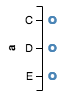

In [5]:
Chart(data).encode(y='a')

The result is a one-dimensional visualization representing the values taken on by ``a``.
As above, we can see what this method does to the JSON object by printing it, using IPython's ``_`` shortcut to access the last output:

In [6]:
_.to_dict()

{'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'encoding': {'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'point'}

The result is the same as above with the addition of the ``'encoding'`` item, which here specifies the visualization attribute, the name of the field, and the type of the variable (in this case, a categorical or *nominal* variable).
Notice that Altair is able to automatically determine the type of the variable using built-in heuristics.

The visualization can be made more intersting by adding another encoding: let's map the ``x`` axis to column ``b``:

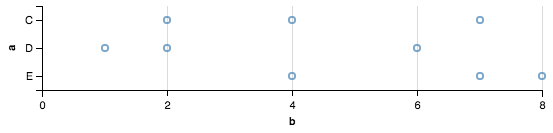

In [7]:
Chart(data).encode(
    y='a',
    x='b'
)

This lets us see the raw data points in the array.

We see above that the default *mark* for a visualization is a ``point``; other mark types can be specified by the ``mark_*()`` methods of the ``Chart`` object, along with optional parameters that specify properties of the mark.
For example, here is the same chart represented with red squares:

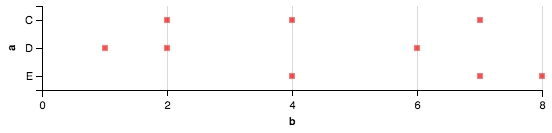

In [8]:
Chart(data).mark_square(
    color='red'
).encode(
    y='a',
    x='b'
)

You can explore the other available ``mark_*()`` methods using IPython's tab-completion.

## Data Transformation: Aggregation

Altair also supports a variety of built-in data transformations, such as aggregation.
The easiest way to specify such aggregations is through a string-function syntax in the argument to the column name.
For example, here we will plot not all the y-values, but a single point representing the average of the y-values:

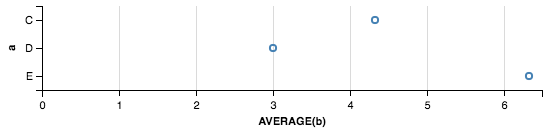

In [9]:
Chart(data).mark_point().encode(
    y='a',
    x='average(b)'
)

More typically, aggregated values are displayed using bar charts.
Making this change is as simple as replacing ``mark_point`` with ``mark_bar``:

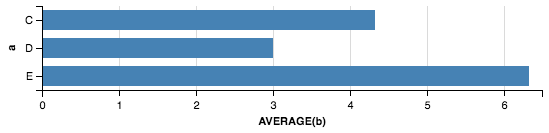

In [10]:
Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

As above, Altair's role in this visualization is converting the resulting object into an appropriate JSON dict.
Here it is, leaving out the data for clarity:

In [11]:
_.to_dict(data=False)

{'encoding': {'x': {'aggregate': 'average',
   'field': 'b',
   'type': 'quantitative'},
  'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'bar'}

Notice that Altair has taken the string encoding ``'average(b)'`` and converted it to a mapping including ``field``, ``type``, and ``aggregate``.
There is a similar shorthand for specifying the type explicitly, using a colon:

In [12]:
x = X('average(b):Q')
x.to_dict()

{'aggregate': 'average', 'field': 'b', 'type': 'quantitative'}

This shorthand is equivalent to spelling-out these properties by name:

In [13]:
x = X('b', aggregate='average', type='quantity')
x.to_dict()

{'aggregate': 'average', 'field': 'b', 'type': 'quantity'}

This is one benefit of using the Altair API over writing the Vega-Lite spec from scratch: valid Vega-Lite specifications can be created very succinctly, with less boilerplate code.

## Customizing your Visualization

By default, Altair via Vega-Lite makes some choices about default properties of the visualization.
Altair also provides hooks to customize the look of the visualization.
For example, we can use the ``X`` object we saw above to override the default x-axis title:

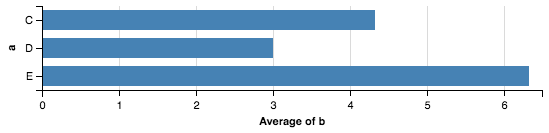

In [14]:
Chart(data).mark_bar().encode(
    y='a',
    x=X('average(b)', axis=Axis(title='Average of b'))
)

Similarly, we can use ``configure_*`` methods to adjust global properties of the chart, such as the chart width or

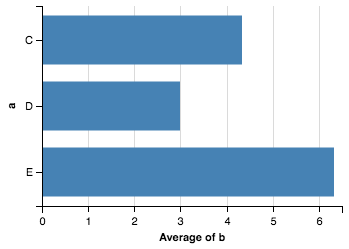

In [15]:
Chart(data).mark_bar().encode(
    y='a',
    x=X('average(b)', axis=Axis(title='Average of b'))
).configure_scale(
    bandSize=50  # scale.bandSize adjusts thickness (in pixels) of bars
).configure_cell(
    width=300  # cell.width adjusts the width (in pixels) of the chart
)

As above, we can inspect how these configuration options affect the resulting Vega-lite specification:

In [16]:
_.to_dict(data=False)

{'config': {'cell': {'width': 300.0}, 'scale': {'bandSize': 50.0}},
 'encoding': {'x': {'aggregate': 'average',
   'axis': {'title': 'Average of b'},
   'field': 'b',
   'type': 'quantitative'},
  'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'bar'}

To learn more about the various configuration options, one useful place to start is Altair's ``Config`` object, along with IPython's documentation capabilities:

In [17]:
Config?

In addition, the Vega-Lite documentation has extensive [Configuration documentation](http://vega.github.io/vega-lite/docs/config.html) and the attribute names used there map directly to names used within Altair.

## Publishing a Visualization Online

Because Altair produces Vega-Lite specifications, it is relatively straightforward to export charts and publish them on the web as Vega-Lite plots.
All that is required is to load the Vega-Lite javascript library, and pass it the JSON plot specification output by Altair.
For convenience Altair contains a built-in bare-bones HTML template that can be used to display any plot.
Here's the template with an empty chart for clarity:

In [18]:
print(Chart().to_html())


<!DOCTYPE html>
<head>
  <title>Vega-Lite Chart</title>
  <meta charset="utf-8">

  <script src="//d3js.org/d3.v3.min.js"></script>
  <script src="//vega.github.io/vega/vega.js"></script>
  <script src="//vega.github.io/vega-lite/vega-lite.js"></script>
  <script src="//vega.github.io/vega-editor/vendor/vega-embed.js" charset="utf-8"></script>

  <style media="screen">
    /* Add space between vega-embed links  */
    .vega-actions a {
      margin-right: 5px;
    }
  </style>
</head>
<body>
  <!-- Container for the visualization -->
  <div id="vis"></div>

  <script>
  var vlSpec = {
    "mark": "point"
}

  var embedSpec = {
    mode: "vega-lite",  // Instruct Vega-Embed to use the Vega-Lite compiler
    spec: vlSpec
  };

  // Embed the visualization in the container with id `vis`
  vg.embed("#vis", embedSpec, function(error, result) {
    // Callback receiving the View instance and parsed Vega spec
    // result.view is the View, which resides under the '#vis' element
  });
  </sc

All that must be changed is the ``vlSpec`` variable, which should contain the Vega-Lite spec output by ``chart.to_dict()``.
To see this in action, we can save the HTML to file and open it as an IFrame:

In [19]:
chart = Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

# Save to file
open('example.html', 'w').write(chart.to_html())

# Display IFrame in IPython
from IPython.display import IFrame
IFrame('example.html', width=400, height=200)

Though this may not work on some online notebook renderers, you should be able to run this locally and confirm that the ``example.html`` file displays correctly.

## Further Visualization Examples

Here we have touched on just the basics of Altair's visualization capabilities.
For more examples of the use of Altair, see the [Main Altair Documentation](Index.ipynb) and notebooks linked from there.